In [4]:
pip install fosforml

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
from fosforml.model_manager.snowflakesession import get_session

my_session = get_session()

In [6]:
my_session.connection.database

'USECASE_DB_BFSI'

In [7]:
my_session.connection.schema

'BRONZE'

In [8]:
table_name = 'CUSTOMER_TRANSACTION_DIM1'

In [9]:
sf_df =my_session.sql("select * from {}".format(table_name))

In [10]:
type(sf_df)

snowflake.snowpark.dataframe.DataFrame

In [11]:
df=sf_df.to_pandas()

In [12]:
type(df)

pandas.core.frame.DataFrame

In [13]:
df.head(5)


,CUSTOMER_ID,SEX,AGE,OCCUPATION,EDUCATION_LEVEL,REGISTRATION_DATE,HOBBIES,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,...,MARITAL_STATUS,GENDER,DEPENDENTS,BANK_ACCOUNT_TYPE,BALANCE,BALANCE_FREQUENCY,CREDIT_LIMIT,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX
0,PNC8037640c-94ea-4339-9665-ae95266fb,FEMALE,49,Undisclosed,Undisclosed,2000-05-12,Undisclosed,101.124,0.0,103.986,...,Single,West,No Dependents,Savings,42.332275,Very high,1050.0,0.000000,0.00,0.0
1,PNCa191f74d-5afb-48f6-86eb-8b192cc6f,FEMALE,30,Undisclosed,Undisclosed,2006-05-12,Undisclosed,98.739,0.0,103.032,...,Single,West,No Dependents,Savings,38.446704,Very high,1090.0,0.000000,0.00,0.0
2,PNC4dcce459-619d-4bc1-b4f9-3f33c4b20,MALE,20,Undisclosed,Undisclosed,2021-04-12,Undisclosed,98.739,0.0,89.676,...,Single,West,No Dependents,Savings,37.219682,High,910.0,0.000000,0.00,0.0
3,PNC17e507c0-0854-4785-8aa0-d77e1be74,FEMALE,25,Undisclosed,Undisclosed,2022-06-12,Undisclosed,102.078,0.0,88.722,...,Single,West,No Dependents,Savings,42.945786,High,940.0,0.000000,0.00,0.0
4,PNCbc85f095-e62d-4b8f-9a57-22ea37cc2,MALE,61,Undisclosed,Undisclosed,2007-08-12,Undisclosed,0.000,0.0,0.000,...,Married,North,Two Dependents,Credit,3202.467416,Very high,7000.0,6442.945483,0.25,4.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122882 entries, 0 to 122881
Data columns (total 29 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   CUSTOMER_ID                       122882 non-null  object 
 1   SEX                               122882 non-null  object 
 2   AGE                               122882 non-null  int8   
 3   OCCUPATION                        122882 non-null  object 
 4   EDUCATION_LEVEL                   122882 non-null  object 
 5   REGISTRATION_DATE                 122882 non-null  object 
 6   HOBBIES                           122882 non-null  object 
 7   PURCHASES                         122882 non-null  float64
 8   ONEOFF_PURCHASES                  122882 non-null  float64
 9   INSTALLMENTS_PURCHASES            122882 non-null  float64
 10  PURCHASES_FREQUENCY               122882 non-null  object 
 11  ONEOFF_PURCHASES_FREQUENCY        122882 non-null  o

In [15]:
df.shape


(122882, 29)

In [16]:
df.describe()

,AGE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_TRX,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,BALANCE,CREDIT_LIMIT,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX
count,122882.000000,122882.000000,122882.000000,122882.000000,122882.000000,122882.000000,122882.000000,122882.000000,122882.000000,122882.000000,122882.000000,122882.000000,122882.000000
mean,43.797562,1099.564457,664.464070,433.436971,15.651714,1905.326844,904.191004,0.144282,1754.150353,4992.170999,1040.357561,0.138151,3.330813
std,14.657011,2326.985730,1796.346935,968.862796,26.447019,3097.091529,2492.709290,0.283152,2212.505505,3785.952399,2177.373457,0.203030,6.875069
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,36.660000,0.000000,0.000000,0.940000,436.491025,169.036005,0.000000,174.936826,1944.000000,0.000000,0.000000,0.000000
50%,44.000000,393.760000,70.850000,79.900000,7.360000,969.973369,336.723916,0.000000,1023.875197,3906.000000,0.000000,0.000000,0.000000
75%,56.000000,1219.995600,674.375100,490.990500,18.630000,2088.197081,893.466612,0.107000,2390.085192,6975.000000,1222.121879,0.230000,3.860000
max,69.000000,49039.570000,43873.984800,22500.000000,378.230000,51154.352082,76406.207520,1.000000,20160.158820,30240.000000,47137.211760,1.500000,123.000000


In [17]:
df.isnull().sum()

CUSTOMER_ID                         0
SEX                                 0
AGE                                 0
OCCUPATION                          0
EDUCATION_LEVEL                     0
REGISTRATION_DATE                   0
HOBBIES                             0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
PURCHASES_TRX                       0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
DATE                                0
EMPLOYMENT_STATUS                   0
MARITAL_STATUS                      0
GENDER                              0
DEPENDENTS                          0
BANK_ACCOUNT_TYPE                   0
BALANCE                             0
BALANCE_FREQUENCY                   0
CREDIT_LIMIT                        0
CASH_ADVANCE

In [18]:
import matplotlib.pyplot as plt

In [19]:
fig =plt.figure(figsize=(10,5))

<Figure size 1000x500 with 0 Axes>

<BarContainer object of 122882 artists>

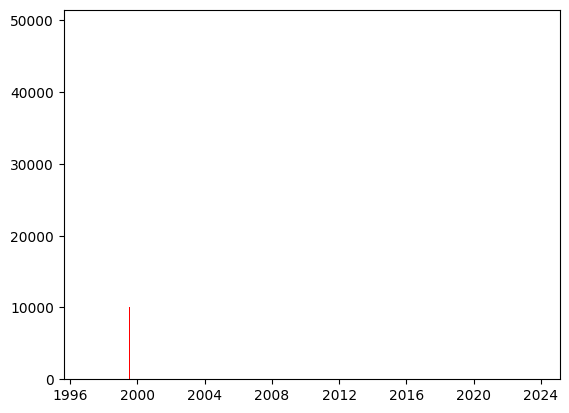

In [20]:
plt.bar(df['REGISTRATION_DATE'],df['PURCHASES'],color='Red',width=0.4)

In [21]:
import numpy as nm

In [22]:
import pandas as pd

In [23]:
x = df.iloc[:, [3, 4]].values

In [24]:
df.corr(numeric_only=True)

,AGE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_TRX,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,BALANCE,CREDIT_LIMIT,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX
AGE,1.000000,-0.003422,-0.001764,-0.005442,-0.000449,-0.004286,-0.004130,-0.001723,-0.002690,-0.001197,0.000594,0.001065,-0.000919
PURCHASES,-0.003422,1.000000,0.915501,0.681649,0.689996,0.608238,0.092788,0.196549,0.170269,0.347433,-0.055261,-0.125034,-0.069274
ONEOFF_PURCHASES,-0.001764,0.915501,1.000000,0.342491,0.549837,0.573336,0.047017,0.153391,0.150717,0.308378,-0.037296,-0.091939,-0.051950
INSTALLMENTS_PURCHASES,-0.005442,0.681649,0.342491,1.000000,0.631315,0.391427,0.132151,0.186583,0.126604,0.259333,-0.063515,-0.129466,-0.070100
PURCHASES_TRX,-0.000449,0.689996,0.549837,0.631315,1.000000,0.375372,0.097213,0.178769,0.148087,0.268766,-0.077618,-0.133124,-0.065074
PAYMENTS,-0.004286,0.608238,0.573336,0.391427,0.375372,1.000000,0.128724,0.131356,0.306302,0.409118,0.440467,0.177074,0.250255
MINIMUM_PAYMENTS,-0.004130,0.092788,0.047017,0.132151,0.097213,0.128724,1.000000,-0.131016,0.397366,0.114865,0.140995,0.106273,0.117000
PRC_FULL_PAYMENT,-0.001723,0.196549,0.153391,0.186583,0.178769,0.131356,-0.131016,1.000000,-0.323597,0.091885,-0.148021,-0.246145,-0.170638
BALANCE,-0.002690,0.170269,0.150717,0.126604,0.148087,0.306302,0.397366,-0.323597,1.000000,0.500182,0.486007,0.455957,0.392495
CREDIT_LIMIT,-0.001197,0.347433,0.308378,0.259333,0.268766,0.409118,0.114865,0.091885,0.500182,1.000000,0.288915,0.126776,0.147525


In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squred_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

ImportError: cannot import name 'mean_squred_error' from 'sklearn.metrics' (/opt/conda/lib/python3.9/site-packages/sklearn/metrics/__init__.py)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [27]:
data = df.copy()

In [28]:
data[['SEX','OCCUPATION','EDUCATION_LEVEL',
       'HOBBIES','PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'EMPLOYMENT_STATUS', 'MARITAL_STATUS', 'GENDER', 'DEPENDENTS',
       'BANK_ACCOUNT_TYPE','BALANCE_FREQUENCY']].head()

,SEX,OCCUPATION,EDUCATION_LEVEL,HOBBIES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,EMPLOYMENT_STATUS,MARITAL_STATUS,GENDER,DEPENDENTS,BANK_ACCOUNT_TYPE,BALANCE_FREQUENCY
0,FEMALE,Undisclosed,Undisclosed,Undisclosed,Very low,Very low,Very low,Unemployed,Single,West,No Dependents,Savings,Very high
1,FEMALE,Undisclosed,Undisclosed,Undisclosed,Very low,Very low,Very low,Unemployed,Single,West,No Dependents,Savings,Very high
2,MALE,Undisclosed,Undisclosed,Undisclosed,Very low,Very low,Very low,Unemployed,Single,West,No Dependents,Savings,High
3,FEMALE,Undisclosed,Undisclosed,Undisclosed,Very low,Very low,Very low,Unemployed,Single,West,No Dependents,Savings,High
4,MALE,Undisclosed,Undisclosed,Undisclosed,Very low,Very low,Very low,Employed,Married,North,Two Dependents,Credit,Very high


In [29]:
status=pd.get_dummies(data[['SEX','OCCUPATION','EDUCATION_LEVEL',
       'HOBBIES','PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'EMPLOYMENT_STATUS', 'MARITAL_STATUS', 'GENDER', 'DEPENDENTS',
       'BANK_ACCOUNT_TYPE','BALANCE_FREQUENCY']], drop_first = True )

In [30]:
status.head()

,SEX_MALE,OCCUPATION_adm-clerical,OCCUPATION_armed-forces,OCCUPATION_craft-repair,OCCUPATION_exec-managerial,OCCUPATION_farming-fishing,OCCUPATION_handlers-cleaners,OCCUPATION_machine-op-inspct,OCCUPATION_other-service,OCCUPATION_priv-house-serv,...,DEPENDENTS_One Dependent,DEPENDENTS_Three or More Dependents,DEPENDENTS_Two Dependents,BANK_ACCOUNT_TYPE_Checking,BANK_ACCOUNT_TYPE_Credit,BANK_ACCOUNT_TYPE_Savings,BALANCE_FREQUENCY_High,BALANCE_FREQUENCY_Low,BALANCE_FREQUENCY_Very high,BALANCE_FREQUENCY_Very low
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,True,False


In [31]:
data=pd.concat([data,status],axis=1)

In [32]:
data.drop(['SEX','OCCUPATION','EDUCATION_LEVEL',
       'HOBBIES','PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'EMPLOYMENT_STATUS', 'MARITAL_STATUS', 'GENDER', 'DEPENDENTS',
       'BANK_ACCOUNT_TYPE','BALANCE_FREQUENCY'],axis=1,inplace=True)

In [33]:
data.head()

,CUSTOMER_ID,AGE,REGISTRATION_DATE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_TRX,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,...,DEPENDENTS_One Dependent,DEPENDENTS_Three or More Dependents,DEPENDENTS_Two Dependents,BANK_ACCOUNT_TYPE_Checking,BANK_ACCOUNT_TYPE_Credit,BANK_ACCOUNT_TYPE_Savings,BALANCE_FREQUENCY_High,BALANCE_FREQUENCY_Low,BALANCE_FREQUENCY_Very high,BALANCE_FREQUENCY_Very low
0,PNC8037640c-94ea-4339-9665-ae95266fb,49,2000-05-12,101.124,0.0,103.986,1.86,211.892188,150.670570,0.000000,...,False,False,False,False,False,True,False,False,True,False
1,PNCa191f74d-5afb-48f6-86eb-8b192cc6f,30,2006-05-12,98.739,0.0,103.032,2.12,213.910209,132.534298,0.000000,...,False,False,False,False,False,True,False,False,True,False
2,PNC4dcce459-619d-4bc1-b4f9-3f33c4b20,20,2021-04-12,98.739,0.0,89.676,1.82,215.928230,131.139200,0.000000,...,False,False,False,False,False,True,True,False,False,False
3,PNC17e507c0-0854-4785-8aa0-d77e1be74,25,2022-06-12,102.078,0.0,88.722,1.86,183.639896,147.880374,0.000000,...,False,False,False,False,False,True,True,False,False,False
4,PNCbc85f095-e62d-4b8f-9a57-22ea37cc2,61,2007-08-12,0.000,0.0,0.000,0.00,4103.032597,1072.340217,0.222222,...,False,False,True,False,True,False,False,False,True,False


In [47]:
X=data.drop(['CUSTOMER_ID','REGISTRATION_DATE','DATE'],axis=1)
y=data['CUSTOMER_ID']

In [48]:
X_Train,X_Test,y_Train,y_Test=train_test_split(X,y,test_size=0.3,random_state=42)

In [49]:
Scaler=MinMaxScaler()

In [44]:
X_Train.head()

,AGE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_TRX,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,DATE,BALANCE,...,DEPENDENTS_One Dependent,DEPENDENTS_Three or More Dependents,DEPENDENTS_Two Dependents,BANK_ACCOUNT_TYPE_Checking,BANK_ACCOUNT_TYPE_Credit,BANK_ACCOUNT_TYPE_Savings,BALANCE_FREQUENCY_High,BALANCE_FREQUENCY_Low,BALANCE_FREQUENCY_Very high,BALANCE_FREQUENCY_Very low
108947,42,534.9144,0.00000,544.9128,11.04,733.188861,159.203020,0.000,2023-07-01,168.960639,...,False,False,False,False,False,True,False,False,True,False
68820,62,3969.3897,2251.30680,1224.5025,84.53,7326.799850,8339.437875,0.000,2023-08-01,8921.691969,...,False,True,False,False,False,False,False,False,True,False
40319,55,287.1320,0.00000,296.4950,7.42,472.270808,138.325444,0.965,2023-10-01,23.301705,...,False,False,False,False,False,True,True,False,False,False
19320,69,263.5290,290.16225,0.0000,2.85,0.000000,0.000000,0.000,2023-09-01,33.694474,...,False,False,False,False,False,True,True,False,False,False
51824,19,559.0560,541.40160,0.0000,2.14,1248.889419,2462.644430,0.000,2022-06-01,2697.549518,...,False,False,False,True,False,False,False,False,True,False


In [46]:
Scaler.fit(X_Train)
X_Train_scaled=scaler.transform(X_Train)
X_Test_scaled=scaler.transform(X_Test)

TypeError: float() argument must be a string or a number, not 'datetime.date'